In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv
Saving o2Saturation.csv to o2Saturation.csv


 # - upload dataset & basic eda

* In this step, you should manually examine the data and pay attention to the data type of the features. There are binary values, integer and float values, and values that look like integers but are actually categorical.

# > What is an outlier?
> Values that appear to be significantly different.
> They may be incorrect inputs or extreme values that would affect the estimate.
> At this stage, you can observe using describe()
# Z-Score
If a data point is more than 3 standard deviations away from the mean  
(in a positive or negative direction), it is called an outlier.
# IQR (Interquartile Range)
IQR is the range between the 75th percentile (Q3) and the 25th percentile (Q1).
A value is an outlier if it is:
- lower than Q1 − 1.5 × IQR, or  
- higher than Q3 + 1.5 × IQR

# -catagorical and numerical future analysis
- - 'age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'
- some of in this features are catagorical, they seems numerical but like (1,2) or (1,2,3)... So they actually converted to numeric:
- i used a countplot from sns to see the status of each feature against the target (in line amed)
- I had a graphic matrix with pairplot to see the relationship between numeric variables and whether there is any distinction between classes.(30)

# -box swarm cat correlation analysis
- to prepare the dataset for a box plot, we need to standardize some values because the numerical difference between the values is very high, making the box plot difficult to read. (34)
- Scaling: Compressing the values in a dataset into a range. Used when:
> Numerical variables at different scales                                        
> Distance-based models (KNN, K-Means, SVM, Logistic Regression, PCA, etc.)
> Gradient descent algorithms (Artificial Neural Networks, Linear Regression, Logistic Regression, etc.)
- StandardScaler
>Scales data so that the mean is 0 and the standard deviation is 1.
>If the data is close to a normal distribution.
- MinMaxScaler
>Compresses data between 0 and 1.                                              
>If the distribution is not important, it is suitable for fast algorithms.
- RobustScaler
>What it does: Scales using median and IQR.
More robust to outliers.



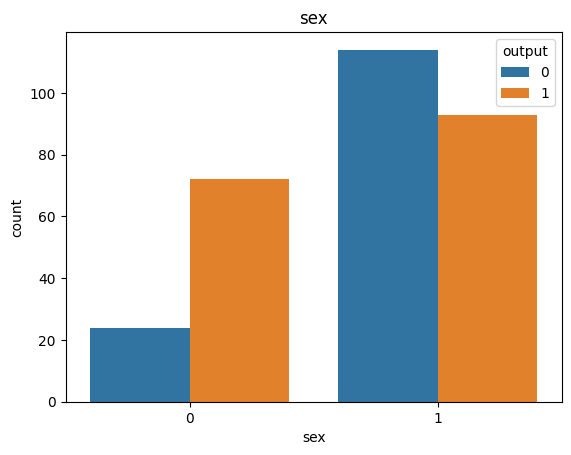

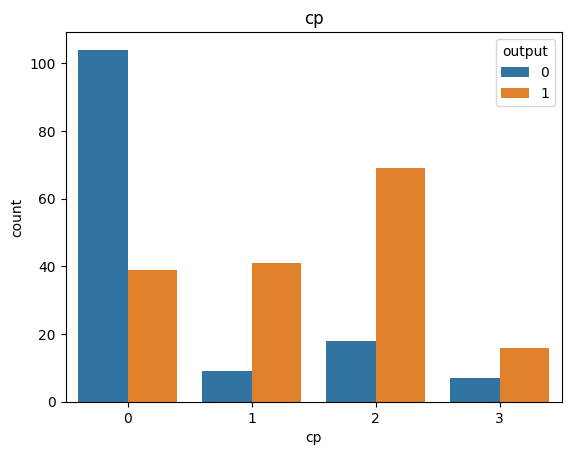

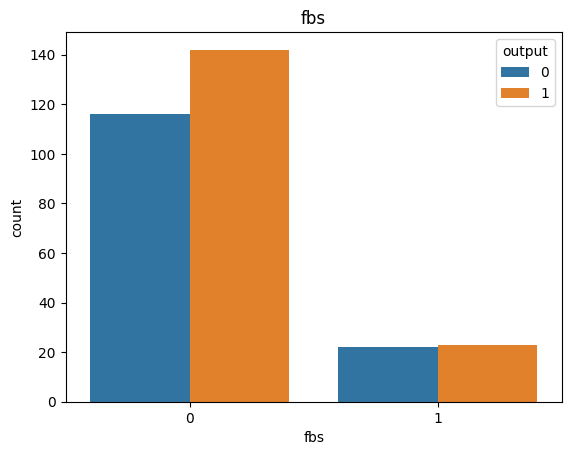

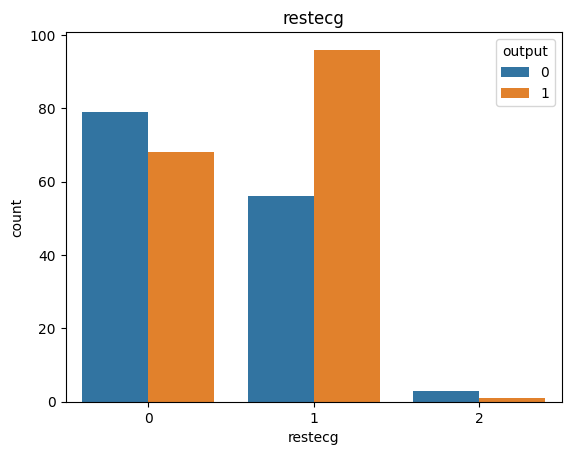

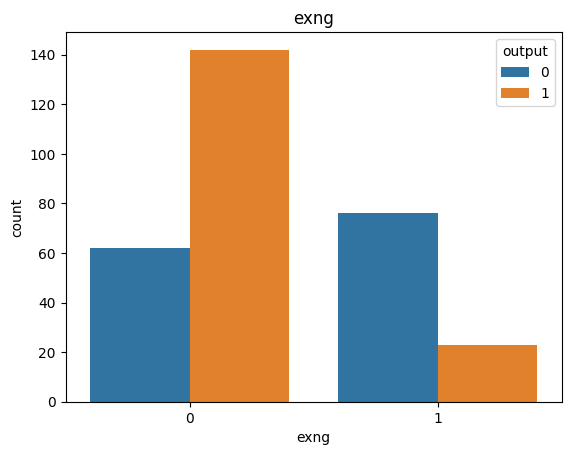

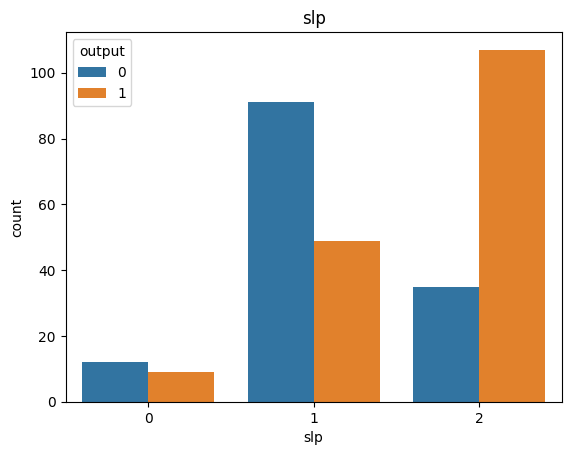

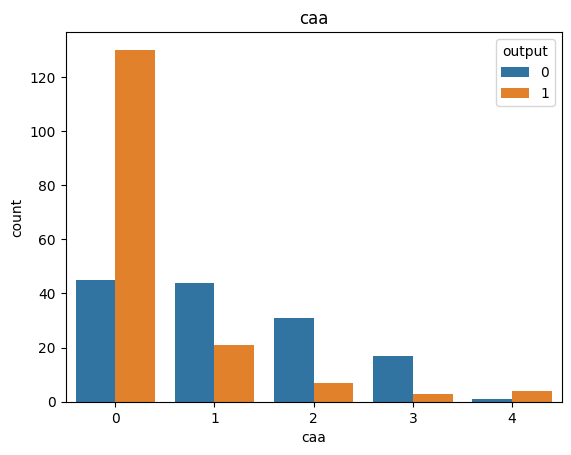

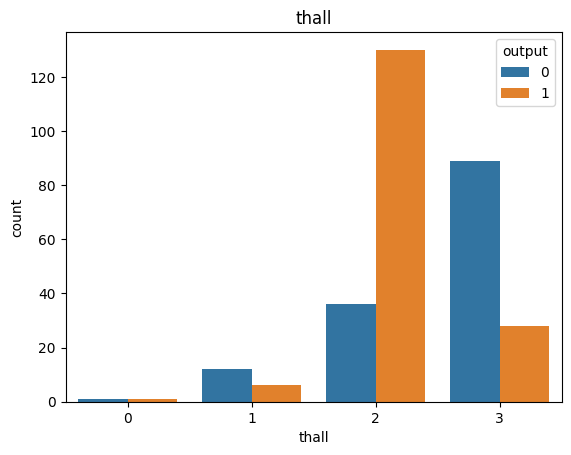

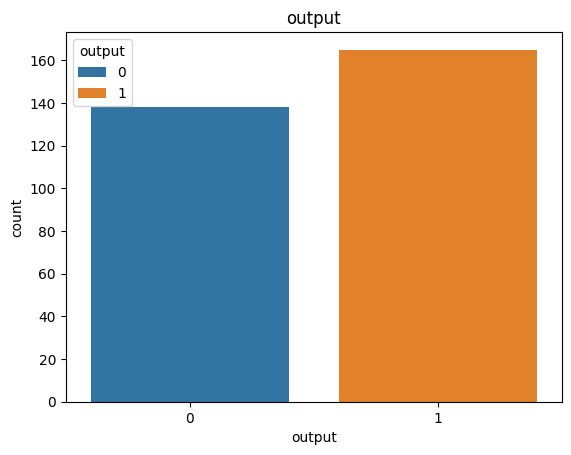

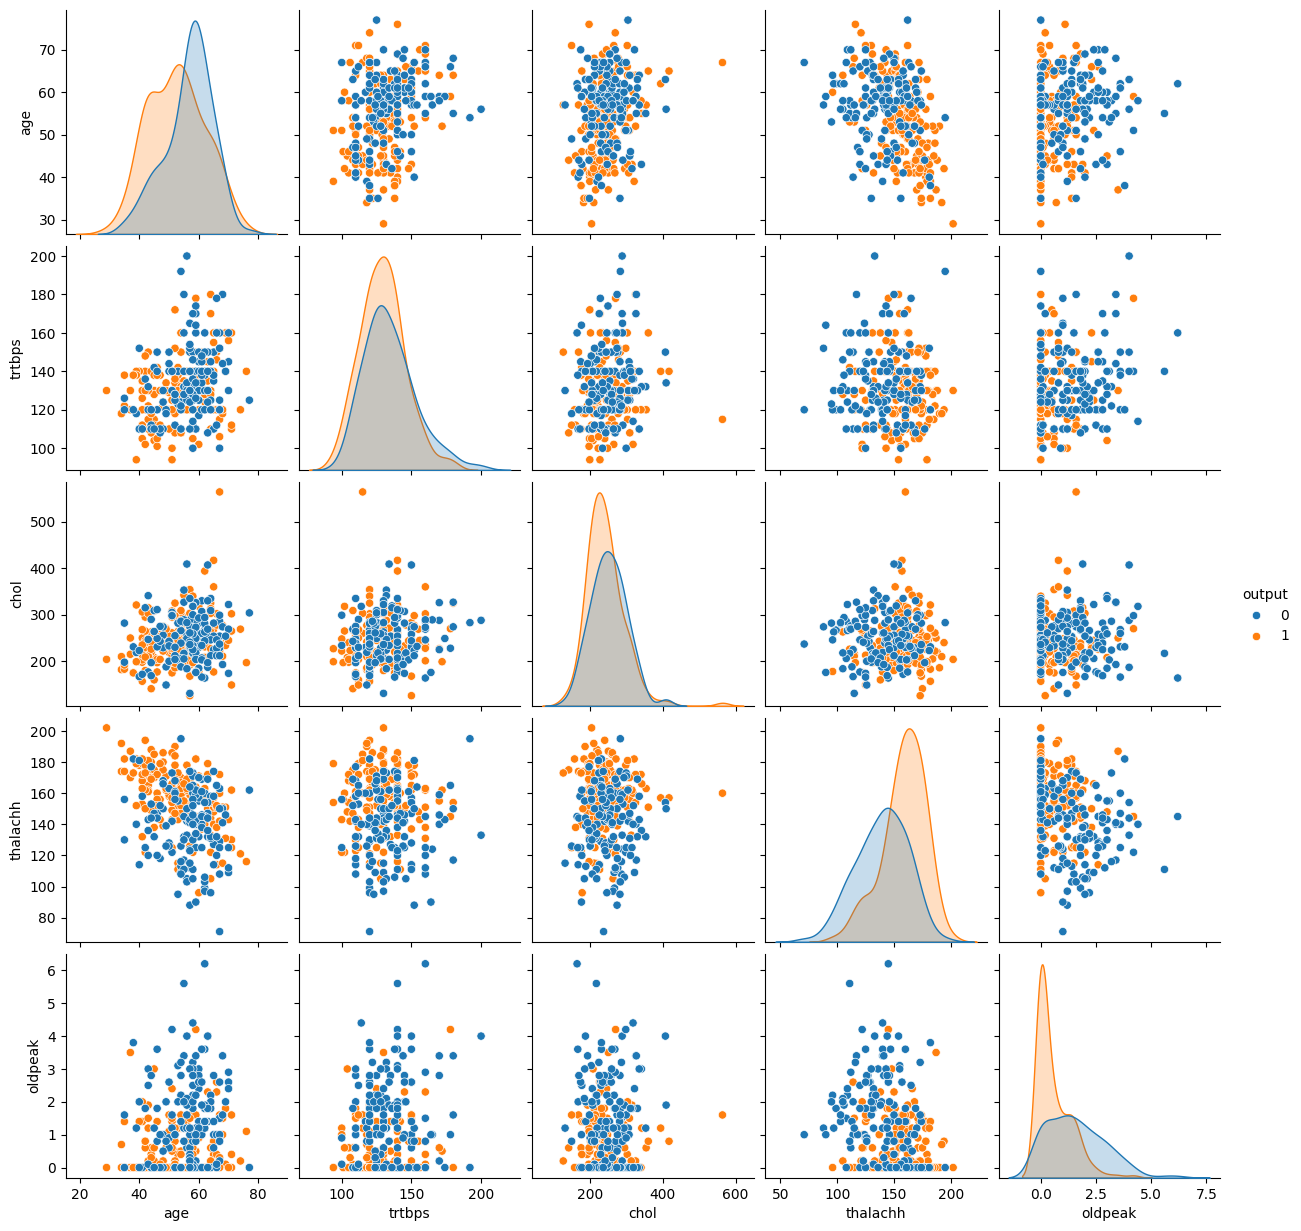

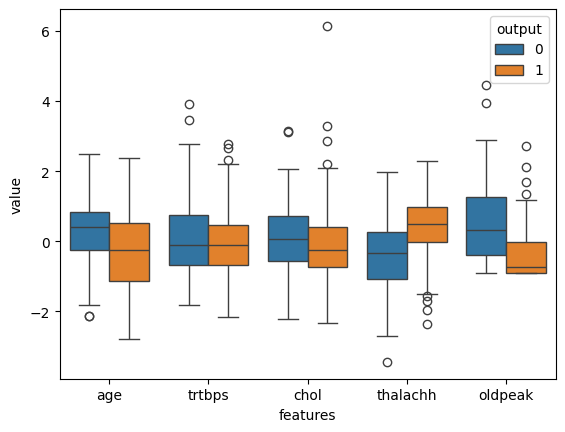

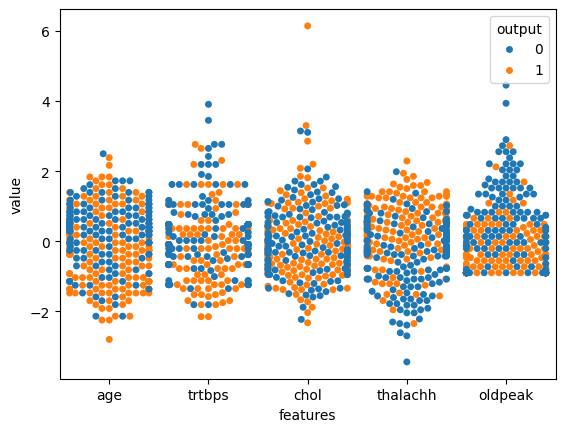

<Figure size 640x480 with 0 Axes>

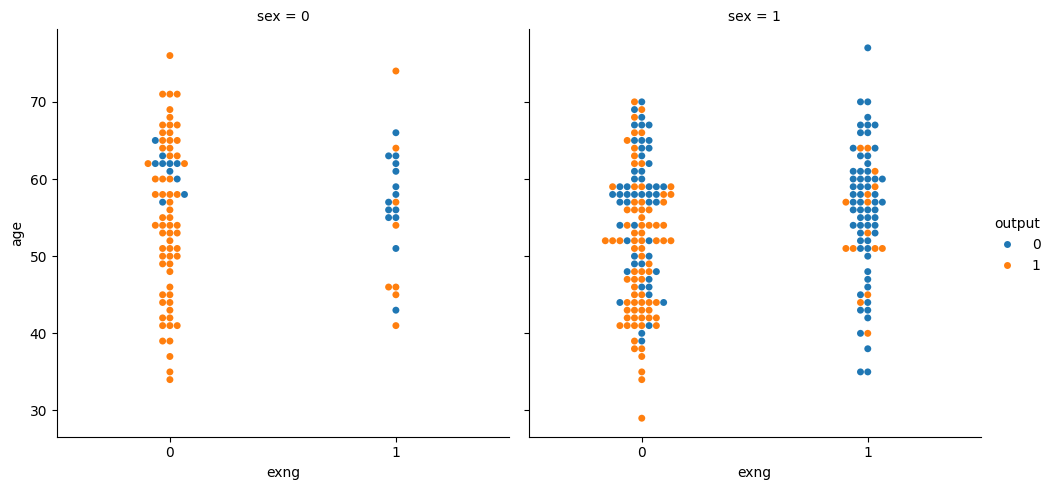

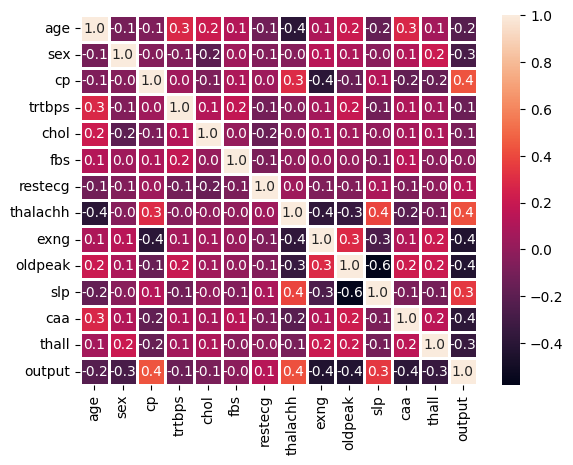

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('heart.csv')
# # # describe = df.describe()
# # #'age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'
categoric_features = ['sex', 'cp', 'fbs' , 'restecg', 'exng' ,'slp', 'caa', 'thall', 'output' ]

df_catogaric = df.loc[:, categoric_features]

for i in categoric_features:
    plt.figure()
    sns.countplot(x = i, data = df_catogaric , hue = 'output')
    plt.title(i)


numeric_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak' , 'output']


df_numeric = df.loc[:, numeric_features]
sns.pairplot(df_numeric, hue='output', diag_kind='kde')
plt.show()

scaler =  StandardScaler()
scaled_array = scaler.fit_transform(df[numeric_features[:-1]])


df_dummy = pd.DataFrame(scaled_array, columns=numeric_features[:-1])
df_dummy = pd.concat([df_dummy, df.loc[:, 'output']], axis=1)


# ##boxplot
data_melted = pd.melt(df_dummy, id_vars= 'output', var_name='features', value_name='value')
plt.figure()
sns.boxplot(x='features', y='value', hue='output',data=data_melted)
plt.show()

##swarmplot
plt.figure()
sns.swarmplot(x='features', y='value', hue='output',data=data_melted)
plt.show()


# #catplot
plt.figure()
sns.catplot(x='exng', y='age', hue='output', col='sex',kind='swarm',data=df)
plt.show()

plt.figure()
sns.heatmap(df.corr(), annot=True, fmt='.1f',linewidths=0.8)
plt.show()





# Countplot
In the restecg feature, category '2'; in thall, category '0'; in caa, category '4'; and in slp, category '0' have very few samples and do not show a strong relationship with the output.
The model can be tested again after solving this issue using the suggestions below, and results can be compared.
Suggestions:
- Grouping / Merging
- Combine rare categories under "Other"
- Use Target encoding or Frequency encoding
- Drop the category if the sample size is too small

Significant differences between categories in features are important for helping the model make correct predictions.

# Numeric Pair
Here, we should pay attention to:
- Clearly separated classes
- Clusters or linear relationships between features
Some outliers are also noticeable in these plots.
To see them more clearly, we can also use swarmplot or boxplot.

# Swarmplot and Boxplot
Outliers are clearly visible here, and feature engineering was decided based on this.

- Swarmplot
Also, the exng feature showed how it affects the output depending on age and sex.
This method can be useful in other analyses to observe feature combinations depending on the dataset and problem.
>The dtype of the features should be considered when doing this.

# Correlation
- Features with high correlation with the output carry important signals for prediction.
-Features with negative correlation mean that as the feature value increases, the chance of having the disease also increases.

age,old shape: (303,)
new shape: (303, 14)
trtbps,old shape: (303,)
new shape: (301, 14)
chol,old shape: (301,)
new shape: (300, 14)
thalachh,old shape: (300,)
new shape: (300, 14)
oldpeak,old shape: (300,)
new shape: (298, 14)
acuarcy score: 0.9


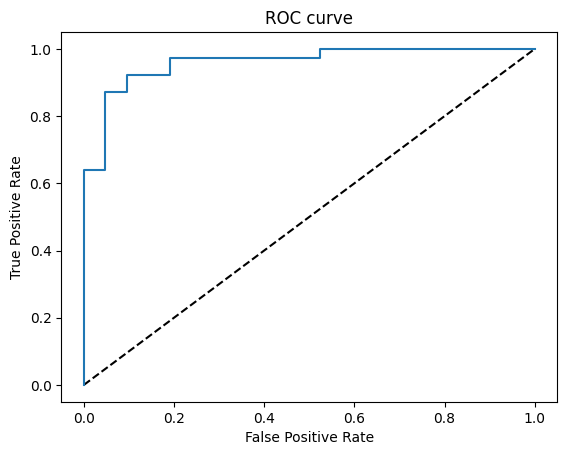

best parameter: {'penalty': 'l2'}
accuarcy score: 0.9


In [27]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

df = pd.read_csv('heart.csv')

categoric_features = ['sex', 'cp', 'fbs' , 'restecg', 'exng' ,'slp', 'caa', 'thall', 'output' ]

numeric_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak' , 'output']

for i in numeric_features[:-1]:
   Q1 = np.percentile(df.loc[:,i],25)
   Q3 = np.percentile(df.loc[:,i],75)

   IQR = Q3 - Q1
   print(f"{i},old shape: {df.loc[:,i].shape}")
   upper_bound = np.where(df.loc[:,i] >= (Q3 + 2.5*IQR))
   lower_bound = np.where(df.loc[:,i] <= (Q1 - 2.5*IQR))

   try:
       df.drop(upper_bound[0],inplace= True)
   except: print("error")

   try:
       df.drop(lower_bound[0],inplace= True)
   except: print("error")
   print(f"new shape: {df.shape}")


# ### catagorical to numeric one hot encoding
df = pd.get_dummies(df, columns= categoric_features[:-1], drop_first=True)
x = df.drop(['output'], axis=1)
y = df[['output']]

""" x:
   age  trtbps  chol  thalachh  oldpeak  sex_1   cp_1   cp_2   cp_3  fbs_1  ...
0   63     145   233       150      2.3   True  False  False   True   True   ...
1   37     130   250       187      3.5   True  False   True  False  False   ...
2   41     130   204       172      1.4  False   True  False  False  False   ...
3   56     120   236       178      0.8   True   True  False  False  False   ...
4   57     120   354       163      0.6  False  False  False  False  False  ....
y:
   output
0       1
1       1
2       1
3       1
4       1
"""

scaler = StandardScaler()
scaler.fit_transform(x[numeric_features[:-1]])

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=40)

# ###logistic regresion model
logres = LogisticRegression()
logres.fit(x_train, y_train)

y_pred_proba = logres.predict_proba(x_test)
"""[[0.08242428 0.91757572]
 [0.17857368 0.82142632]
 [0.08508264 0.91491736]
 [0.91334222 0.08665778]
 [0.06898808 0.93101192]
 [0.96090199 0.03909801]
 [0.99547556 0.00452444]
 [0.54588828 0.45411172]]"""

y_pred = np.argmax(y_pred_proba, axis=1)
print(f"acuarcy score: {accuracy_score(y_test,y_pred)}")

"""acuarcy score: 0.8333333333333334"""

# ###roc curve

fpr, tpr, threshold = roc_curve(y_test,y_pred_proba[:,1])

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr, label= "LOGİSTİC REGRESSION")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()

# ### hyper parameter tuning
lr = LogisticRegression()
penalty = ['l1','l2']
parameters = {"penalty": penalty}

lr_searcher = GridSearchCV(lr,parameters)

lr_searcher.fit(x_train, y_train)


print(f"best parameter: {lr_searcher.best_params_}")
# ### ->best parameter: {'penalty': 'l2'}


y_pred= lr_searcher.predict(x_test)

print(f"accuarcy score: {accuracy_score(y_test,y_pred)}")
# ### ->accuarcy score: 0.9







# -modelling & hyperparameter tuning
- Outlier Removal
>We found and removed outliers in numeric columns using the IQR method.
>The goal is to make the model more stable and give more realistic results.

- Converting Categorical Data to Numeric
>We used one-hot encoding to turn categorical data into numbers.
>We used drop_first=True to avoid extra columns that are not needed (dummy variable trap).
>This helped the logistic regression model to learn each category as a separate column.

- Feature Scaling (Standardization)
>We scaled the numeric features using the z-score method.
>This is important for models like regression that use distance.
>This way, all features are on the same scale, and the model learns better.

- Logistic Regression
>This model is common, easy to understand, and strong for classification problems.
>It is a good choice when the target has only two values, like 0 and 1.

- Probability Prediction
>Instead of predicting a class, the model gives a probability.
>These probabilities are used for metrics like the ROC curve.
>If the curve is above the random line, it means the model is making meaningful predictions.

- Hyperparameter Tuning (GridSearchCV)
>We improved the model by finding the best penalty parameter.
>GridSearchCV tested different penalty values to find the best one.
>In the end, the best parameter was chosen as l2.

